In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
s1=[0,0,1,0]
s2=[0,0,1,0]
m1=[1,1,0,1]
c1=[0,0,1,0]

In [ ]:
m=pd.DataFrame(zip(s1,s2,m1,c1),index=['s1','s2','m1','c1'],columns=['s1','s2','m1','c1'])
m

,s1,s2,m1,c1
s1,0,0,1,0
s2,0,0,1,0
m1,1,1,0,1
c1,0,0,1,0


In [ ]:
s1=[0,0,1508,0]
s2=[0,0,807,0]
m1=[1508,807,0,167]
c1=[0,0,167,0]


In [ ]:
n=pd.DataFrame(zip(s1,s2,m1,c1),index=['s1','s2','m1','c1'],columns=['s1','s2','m1','c1'])
n

,s1,s2,m1,c1
s1,0,0,1508,0
s2,0,0,807,0
m1,1508,807,0,167
c1,0,0,167,0


In [ ]:
s1=[0,0,8,0]
s2=[0,0,5,0]
m1=[8,5,0,6]
c1=[0,0,6,0]

In [ ]:
p=pd.DataFrame(zip(s1,s2,m1,c1),index=['s1','s2','m1','c1'],columns=['s1','s2','m1','c1'])
p

,s1,s2,m1,c1
s1,0,0,8,0
s2,0,0,5,0
m1,8,5,0,6
c1,0,0,6,0


In [ ]:
# S1_M1=['16:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15']
# M1_S1= ['18:25', '06:20', '02:25', '05:15', '09:20', '15:15', '20:18', '22:20']
# S2_M1= ['04:20', '08:35', '12:15', '18:12', '22:18']
# M1_S2= ['12:25', '15:16', '18:21', '07:25', '21:20']
# M1_C1= ['05:50', '10:25', '12:30', '18:15', '21:05', '16:20']
# C1_M1= ['04:00', '07:15', '10:55', '18:35', '21:25', '23:50']
TT = np.array([['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'],['16:25', '19:38', '20:56', '09:13', '12:08'],['03:42', '02:56', '04:15', '03:18', '05:08', '03:50']])


<ipython-input-9-f0bf3b7572c3>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  TT = np.array([['18:35', '21:27', '19:46', '26:25', '28:36', '20:28', '32:16', '22:10'],['16:25', '19:38', '20:56', '09:13', '12:08'],['03:42', '02:56', '04:15', '03:18', '05:08', '03:50']])


In [33]:
S1_M1_1=np.array([['16:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15'],['18:25', '06:20', '02:25', '05:15', '09:20', '15:15', '20:18', '22:20']])
S2_M1_1 = np.array([['4:20', '08:35', '12:15', '18:12', '22:18'],['12:25', '15:16', '18:21', '07:25', '21:20']])
M1_C1_1 = np.array([['05:50', '10:25', '12:30', '18:15', '21:05', '16:20'],['04:00', '07:15', '10:55', '18:35', '21:25', '23:50']])

In [ ]:
arr_time=np.array([['6:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15']])

In [ ]:
def hrsmin(s):
   t=0
   for u in s.split(':'):
      t = 60*t + int(u)
   return t
arr_time = ['6:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15']
for s in arr_time  :
  print(hrsmin(s))


390
880
235
85
626
745
395
1215


In [ ]:
dep_time=np.array([['18:25', '06:20', '02:25', '05:15', '09:20', '15:15', '20:18', '22:20']])

In [ ]:
#24-hour format
def time_to_min(t):
  hr, mins = [int(i) for i in t.split(':')]
  return (hr*60) + mins
def min_to_time(mins):
  mins = mins % (24*60)
  hr = mins//60
  min = mins % 60
  return f'{hr}:{min}'
def arrival_time(dep_time, tt):
  arr_time = time_to_min(dep_time) + time_to_min(tt)
  return arr_time

In [34]:
arr_S1_M1 = [np.vectorize(arrival_time)(i, TT[0]) for i in S1_M1_1]

arr_S2_M1 = [np.vectorize(arrival_time)(i, TT[1]) for i in S2_M1_1]

arr_M1_C1 = [np.vectorize(arrival_time)(i, TT[2]) for i in M1_C1_1]

In [67]:
df = pd.DataFrame({'Train Num': [],'Departure Time': [],'Start Node': [],'Destination Node': [],
                   'Arrival Time ': [],'Departure Time (in mins)': [],'Arrival Time (in mins)': []})


In [68]:
for i in range(2):

  s = {0: ['S1', 'M1'],
                  1: ['M1', 'S1']}

  t = 0
  for dt, at in zip(S1_M1_1[i], arr_S1_M1[i]):

    f = [f'Train {t+ 1}', dt, s[i][0], s[i][1], at, dt, at]

    df.loc[len(df)] = f

    t += 1

In [72]:
for i in range(2):

  s = {0: ['S2', 'M1'],
                  1: ['M1', 'S2']}

  t= 0
  for dt, at in zip(S2_M1_1[i], arr_S2_M1[i]):

      f = [f'Train {t + 1}', dt, s[i][0], s[i][1], at, dt, at]

      df.loc[len(df)] =f

      t+= 1

In [73]:
for i in range(2):

  s = {0: ['C1', 'M1'],
                  1: ['M1', 'C1']}


  t = 0
  for dt, at in zip(M1_C1_1[i], arr_M1_C1[i]):

    f = [f'Train {t + 1}', dt, s[i][0], s[i][1], at, dt, at]

    df.loc[len(df)] =f

    t += 1

In [74]:
df.head()

,Train Num,Departure Time,Start Node,Destination Node,Arrival Time,Departure Time (in mins),Arrival Time (in mins)
0,Train 1,16:30,S1,M1,2105,16:30,2105
1,Train 2,14:40,S1,M1,2167,14:40,2167
2,Train 3,03:55,S1,M1,1421,03:55,1421
3,Train 4,01:25,S1,M1,1670,01:25,1670
4,Train 5,10:26,S1,M1,2342,10:26,2342


In [88]:
s1_m1= ['16:30', '14:40', '03:55', '01:25', '10:26', '12:25', '06:35', '20:15']

s2_m1= ['04:20', '08:35', '12:15', '18:12', '22:18']

m1_c1= ['05:50', '10:25', '12:30', '18:15', '21:05', '16:20']

list1=[]
for i in range(1,20):
  list1.append('T'+str(i))
s1=['m1']*13
s2=['c1']*6
s3=s1+s2
timings=s1_m1+s2_m1+m1_c1
data={'train number':list1,'stations':s3,'timings':timings}
df=pd.DataFrame(data)
df['timings'] = pd.to_datetime(df['timings'])
# Define layover times in hours
layover_times = [1, 2, 5]

feasible_departures = []

for layover_time in layover_times:
    feasible_departures.append(
        len(df[(df['stations'] == 'c1') & (df['timings'] >= (df['timings'] + pd.to_timedelta(f'{layover_time} hours')).shift(-1))])
    )
feasible_departures

[1, 1, 0]

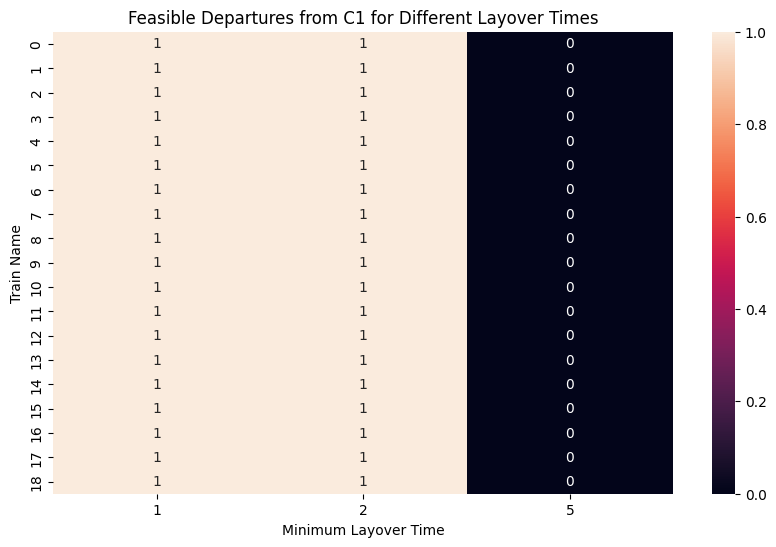

In [93]:
d = []

for train_name in df['train number']:
    row_data = []
    for layover_time in layover_times:
         count = len(df[(df['stations'] == 'c1') & (df['timings'] >= (df['timings'] + pd.to_timedelta(f'{layover_time} hours')).shift(-1))])
         row_data.append(count)
    d.append(row_data)

#Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(d,  annot=True, xticklabels=layover_times)
plt.xlabel('Minimum Layover Time')
plt.ylabel('Train Name')
plt.title('Feasible Departures from C1 for Different Layover Times')
plt.show()
